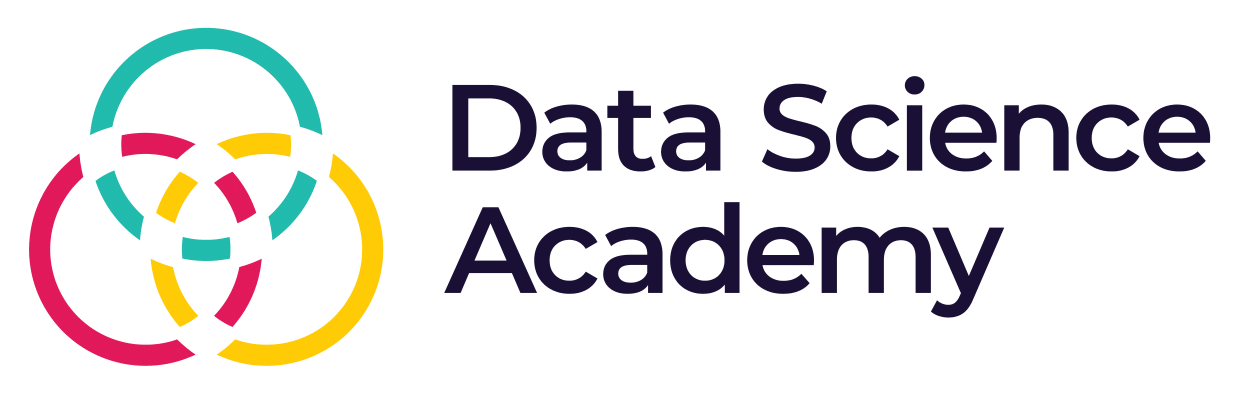

# Logistic Regression

In [93]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

In [102]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [105]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

In [106]:
titanic.drop('Cabin',axis=1,inplace=True)
titanic.dropna(inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [108]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [99]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)#drop the sex,embarked,name and tickets columns
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)#concatenate new sex and embark column to our train dataframe
titanic = pd.concat([titanic,sex,embark],axis=1)#check the head of dataframe
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), 
           titanic['Survived'], test_size=0.30, 
            random_state=101)

In [9]:
from sklearn.linear_model import LogisticRegression #create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\eljan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
#predictions
predictions = logmodel.predict(X_test)

In [11]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



In [13]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[148  15]
 [ 39  65]]


In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_score(y_test,predictions)

0.7664877300613496

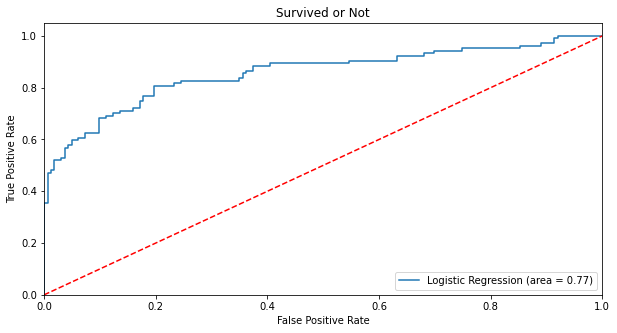

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

GaussianNB()

In [18]:
predicted = NBmodel.predict(X_test)

In [19]:
predicted

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [21]:
cm2 = confusion_matrix(y_test,predicted)
score2 = accuracy_score(y_test,predicted)
cr2 = classification_report(y_test,predicted)
auc2 = roc_auc_score(y_test,predicted)

In [22]:
print('Confusion Matrix for Naive Bayes:''\n',cm2 )

Confusion Matrix for Naive Bayes:
 [[144  19]
 [ 33  71]]


In [23]:
print('Accuracy Score for Naive Bayes:',score2 )

Accuracy Score for Naive Bayes: 0.8052434456928839


In [24]:
print('Classification Report for Naive Bayes:''\n''\n',cr2)

Classification Report for Naive Bayes:

               precision    recall  f1-score   support

           0       0.81      0.88      0.85       163
           1       0.79      0.68      0.73       104

    accuracy                           0.81       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.80      0.81      0.80       267



In [25]:
print('Auc Score for Naive Bayes:',auc2 )

Auc Score for Naive Bayes: 0.7830639452571968


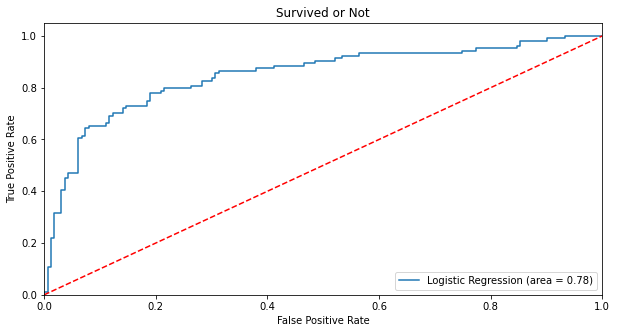

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, NBmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, NBmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# KNN

We are going to use the famous iris data set for our KNN example. The dataset consists of four attributes: sepal-width, sepal-length, petal-width and petal-length. These are the attributes of specific types of iris plant. The task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica.

In [27]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [28]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Preprocessing
The next step is to split our dataset into its attributes and labels. To do so, use the following code:



In [29]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

### Train Test Split
To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data, as it would be in a production application.

To create training and test splits, execute the following script:

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

The above script splits the dataset into 80% train data and 20% test data. This means that out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records.

### Training and Predictions
It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. In the second line, this class is initialized with one parameter, i.e. n_neigbours. This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.

The final step is to make predictions on our test data. To do so, execute the following script:

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [34]:
y_test

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

### Evaluating the Algorithm
For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion matrix ''\n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix 
 [[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Classification algorithms: SVM, Decision Tree and Random Forest

# SVM

In [1]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [37]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [38]:
Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']

In [39]:
cancer.data[0:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [40]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [41]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=100) # 70% training and 30% test

In [42]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [43]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [44]:
y_test

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [45]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9532163742690059


In [46]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9519230769230769
Recall: 0.9705882352941176


In [47]:
print("Classification Report for SVM:""\n",metrics.classification_report(y_test, y_pred))

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        69
           1       0.95      0.97      0.96       102

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



# Decision Tree

In [5]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
import pandas as pd

In [6]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [7]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features - 16, 3060, 1tb - 1 
y = pima.label # Target variable    4,1050,256 - 0

In [10]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # 70% training and 30% test

In [53]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7229437229437229


In [55]:
print("Classification Report for Decision Tree:""\n",metrics.classification_report(y_test, y_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78       150
           1       0.60      0.65      0.62        81

    accuracy                           0.72       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.73      0.72      0.73       231



In [56]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [57]:
print("Classification Report for Decision Tree:""\n",metrics.classification_report(y_test, y_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       150
           1       0.66      0.70      0.68        81

    accuracy                           0.77       231
   macro avg       0.75      0.76      0.75       231
weighted avg       0.77      0.77      0.77       231



# Random Forest

In [11]:
features = pd.read_csv('temps.csv')
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [12]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [60]:
# Labels are the values we want to predict
labels = np.array(features['actual'])   #16,1050,256-features 
# Remove the labels from the features    target/label - 1 
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [61]:
feature_list

['year',
 'month',
 'day',
 'temp_2',
 'temp_1',
 'average',
 'forecast_noaa',
 'forecast_acc',
 'forecast_under',
 'friend',
 'week_Fri',
 'week_Mon',
 'week_Sat',
 'week_Sun',
 'week_Thurs',
 'week_Tues',
 'week_Wed']

In [62]:
labels

array([45, 44, 41, 40, 44, 51, 45, 48, 50, 52, 45, 49, 55, 49, 48, 54, 50,
       54, 48, 52, 52, 57, 48, 51, 54, 56, 57, 56, 52, 48, 47, 46, 51, 49,
       49, 53, 49, 51, 57, 62, 56, 55, 58, 55, 56, 57, 53, 51, 53, 51, 51,
       60, 59, 61, 60, 57, 53, 58, 55, 59, 57, 64, 60, 53, 54, 55, 56, 55,
       52, 54, 49, 51, 53, 58, 63, 61, 55, 56, 57, 53, 54, 57, 59, 51, 56,
       64, 68, 73, 71, 63, 69, 60, 57, 68, 77, 76, 66, 59, 58, 60, 59, 59,
       60, 68, 77, 89, 81, 81, 73, 64, 65, 55, 59, 60, 61, 64, 61, 68, 77,
       87, 74, 60, 68, 77, 82, 63, 67, 75, 81, 77, 82, 65, 57, 60, 71, 64,
       63, 66, 59, 66, 65, 66, 66, 65, 64, 64, 64, 71, 79, 75, 71, 80, 81,
       92, 86, 85, 67, 65, 67, 65, 70, 66, 60, 67, 71, 67, 65, 70, 76, 73,
       75, 68, 69, 71, 78, 85, 79, 74, 73, 76, 76, 71, 68, 69, 76, 68, 74,
       71, 74, 74, 77, 75, 77, 76, 72, 80, 73, 78, 82, 81, 71, 75, 80, 85,
       79, 83, 85, 88, 76, 73, 77, 73, 75, 80, 79, 72, 72, 73, 72, 76, 80,
       87, 90, 83, 84, 81

In [63]:
features

array([[2.016e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.000e+00, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.016e+03, 1.200e+01, 2.900e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.200e+01, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.200e+01, 3.100e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [64]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = None)

In [65]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = None)
# Train the model on training data
rf.fit(train_features, train_labels)

In [66]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [67]:
test_labels

array([60, 70, 54, 45, 57, 66, 40, 74, 83, 54, 51, 61, 48, 76, 86, 63, 42,
       66, 68, 67, 65, 63, 77, 68, 63, 60, 79, 49, 76, 77, 73, 68, 46, 53,
       52, 52, 68, 49, 71, 53, 67, 57, 63, 64, 51, 69, 51, 78, 59, 48, 44,
       42, 57, 53, 64, 68, 56, 77, 80, 65, 80, 44, 53, 68, 64, 50, 79, 79,
       51, 65, 51, 68, 55, 60, 61, 69, 59, 52, 75, 48, 53, 69, 72, 73, 63,
       79, 48], dtype=int64)

In [68]:
predictions

array([52.6, 63.7, 54.7, 45.5, 51.7, 66.6, 42.5, 75.9, 79.6, 50.8, 48.1,
       57. , 46. , 86.3, 78.6, 69.9, 39.9, 73.1, 69.3, 65. , 61.9, 66.7,
       73.9, 67.2, 63.9, 70.3, 82.8, 55.3, 68.9, 75.5, 76.5, 68.9, 36.8,
       53.3, 52. , 46.4, 73. , 48.8, 64.6, 54.8, 64.8, 57.5, 60.9, 65. ,
       50.7, 71.2, 54.5, 76.1, 58.9, 51.3, 39.9, 38.7, 55. , 49.1, 56.8,
       73.4, 58.7, 70.6, 79.6, 63.7, 75.2, 37.4, 60.1, 72.9, 64.6, 52.5,
       76. , 73.4, 59.3, 57.3, 53.5, 69.6, 56.5, 62.9, 62.3, 70.6, 56. ,
       54.1, 76.4, 50.9, 54.3, 68.4, 75.9, 77.6, 78.6, 80.3, 51.5])

In [69]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.54 degrees.


In [70]:
errors

array([ 7.4,  6.3,  0.7,  0.5,  5.3,  0.6,  2.5,  1.9,  3.4,  3.2,  2.9,
        4. ,  2. , 10.3,  7.4,  6.9,  2.1,  7.1,  1.3,  2. ,  3.1,  3.7,
        3.1,  0.8,  0.9, 10.3,  3.8,  6.3,  7.1,  1.5,  3.5,  0.9,  9.2,
        0.3,  0. ,  5.6,  5. ,  0.2,  6.4,  1.8,  2.2,  0.5,  2.1,  1. ,
        0.3,  2.2,  3.5,  1.9,  0.1,  3.3,  4.1,  3.3,  2. ,  3.9,  7.2,
        5.4,  2.7,  6.4,  0.4,  1.3,  4.8,  6.6,  7.1,  4.9,  0.6,  2.5,
        3. ,  5.6,  8.3,  7.7,  2.5,  1.6,  1.5,  2.9,  1.3,  1.6,  3. ,
        2.1,  1.4,  2.9,  1.3,  0.6,  3.9,  4.6, 15.6,  1.3,  3.5])

In [71]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 94.17 %.


# Advanced Python Programming

### ZIP

The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.


In [72]:
# initializing lists 
name = [ "Bob", "Jack", "Sham", "Asti"] 
age = [ 24, 21, 23, 22 ] 
marks = [ 40, 50, 60, 70] 

# using zip() to map values 
mapped = zip(name, age, marks) 
print(mapped)

# converting values to print as set 
mapped = tuple(mapped) 

# printing resultant values  
print("The zipped result is : ",end="") 
print(mapped) 

The zipped result is : (('Bob', 24, 40), ('Jack', 21, 50), ('Sham', 23, 60), ('Asti', 22, 70))


In [73]:
mapped2 = list(mapped)
mapped2

[('Bob', 24, 40), ('Jack', 21, 50), ('Sham', 23, 60), ('Asti', 22, 70)]

In [74]:
name = [ "Bob", "Jack", "Sham", "Asti"] 
roll_no = [ 4, 1, 3, 2 ] 
marks = [ 40, 50, 60, 70 ]

In [75]:
mapped = zip(name, roll_no, marks) 

In [76]:
print("The zipped result is : ",end="") 
print(tuple(mapped)) 

The zipped result is : (('Bob', 4, 40), ('Jack', 1, 50), ('Sham', 3, 60), ('Asti', 2, 70))


In [77]:
# 1. Lambda functions

# A lambda function can take any number of arguments, but they can return only one value in the form of expression.
# Single one line function ,Anoymous function(no name),no def, no return

In [78]:
def sum(a,b,c):
    return a+b+c

print(sum(3,4,5))

12


In [79]:
add=lambda a,b,c: print(a+b+c)
add(4, 5, 1)

10


In [80]:
def biggest(a,b,c):
    if(a>b and a>c):
        print(a)
    elif(b>a and b>c):
        print(b)
    else:
        print(c)
        
biggest(2,5,8)

8


In [81]:
lambda a,b,c:a if a>b and a>c else(b if b>a and b>c else c)

<function __main__.<lambda>(a, b, c)>

In [2]:
# Find Biggest element(Nested If else in lambda)
find_max=lambda a,b,c: a if a>b and a>c else b if b>a and b>c else c
print(find_max(6,15,1))

15


In [ ]:
# Map

# Syntax: map(fun, iter)
#  fun : It is a function to which map passes each element of given iterable.
#  iter : It is a iterable which is to be mapped.
# You can pass one or more iterable to the map() function.
# The returned value from map() (map object) then can be passed to functions like list() (to create a list), set() (to create a set) .

In [14]:
nums = [1, 2, 3, 4, 5] 
for i in range(len(nums)):
    # i =1,2,3,4,5
    nums[i]=nums[i]**2
print(nums)

[1, 4, 9, 16, 25]


In [ ]:
nums = [1, 2, 3, 4, 5]  
def sq(n):    
    return n**2

#print(sq(nums))
list5=[]

for i in nums:
    #1,2
    print(sq(i),end=" ") # 1,4
    list5.append(sq(i)) #[1,4]
print('\n')
print(list5)
print('\n')
print('\n')
#print(sq(nums))

print(list(map(sq,nums)))

#square = list(map(sq, nums))
#print(square)

1 4 9 16 25 

[1, 4, 9, 16, 25]




[1, 4, 9, 16, 25]


In [ ]:
nums = [1, 2, 3, 4, 5]  
def sq(n):    
    return n*n  
square = tuple(map(sq, nums))
print(square)

(1, 4, 9, 16, 25)


In [ ]:
nums = [1, 2, 3, 4, 5, 3]  
def sq(n):    
    return n*n  
square = set(map(sq, nums))
print(square)

{1, 4, 9, 16, 25}


In [ ]:
# Using Lambda inside map
nums = [1, 2, 3, 4, 5]

print(list(map(lambda x: x**2,nums)))


square = list(map(lambda x: x**2, nums))
print(square)

print(5==5)

[1, 4, 9, 16, 25]
[1, 4, 9, 16, 25]
True


In [ ]:
#Convert all elements of list in uppercase
people = ["lokesh", "bob", "tom", "developer"]


print(tuple(map(lambda x: x.capitalize(), people)))

up2 = list(map(lambda x: x.capitalize(),people))

up = list(map(lambda x: x.upper(), people))
print(up)

('Lokesh', 'Bob', 'Tom', 'Developer')
['LOKESH', 'BOB', 'TOM', 'DEVELOPER']


In [15]:
names = [
    {'first': 'lokesh', 'last': 'sharma'},
    {'first': 'Astha', 'last': 'verma'},
    {'first': 'jiu', 'last': 'rai'}
 ]
print(names)
print(type(names))

first_names = list(map(lambda x: x['first'], names))
print(first_names)

[{'first': 'lokesh', 'last': 'sharma'}, {'first': 'Astha', 'last': 'verma'}, {'first': 'jiu', 'last': 'rai'}]
<class 'list'>
['lokesh', 'Astha', 'jiu']


In [16]:
names

[{'first': 'lokesh', 'last': 'sharma'},
 {'first': 'Astha', 'last': 'verma'},
 {'first': 'jiu', 'last': 'rai'}]

In [ ]:
# Without Map

my_pets = ['alfred', 'tabitha', 'william', 'arla']
uppered_pets = []

for pet in my_pets:
    pet_ = pet.upper()
    uppered_pets.append(pet_)

print(uppered_pets)

['ALFRED', 'TABITHA', 'WILLIAM', 'ARLA']


In [ ]:
# With Map

my_pets = ['alfred', 'tabitha', 'william', 'arla']

uppered_pets = list(map(str.upper, my_pets))

print(uppered_pets)

['ALFRED', 'TABITHA', 'WILLIAM', 'ARLA']


In [ ]:
# Filter

# Syntax: filter(fun, Iter)
#  fun: function that tests if each element of a sequence true or not.
#  Iter: Iterable which needs to be filtered.

In [ ]:
#Filter out even and odd numbers from list
seq = [0, 1, 2, 3, 4, 5]

# result contains odd numbers of the list
result = filter(lambda x: x % 2 == 1, seq)
print("Odd numbers:",list(result))

# result contains even numbers of the list
result = filter(lambda x: x % 2 == 0, seq)
print("Even numbers:",list(result))

Odd numbers: [1, 3, 5]
Even numbers: [0, 2, 4]


In [ ]:
# Without filter


numbers = [1,2,3,4,5]

even_numbers = []
for number in numbers:
    if (number % 2) == 0:
        even_numbers.append(number)

print(even_numbers)


print(list(filter(lambda x:x%2==0,numbers)))


[2, 4]
[2, 4]


In [ ]:
# With filter

def even(number):
    if (number % 2) == 0:
        return True
    return False

numbers = [1,2,3,4,5]
even_numbers = filter(even, numbers)

In [ ]:
# With filter and lambda

numbers = [1,2,3,4,5]

even_numbers = list(filter(lambda a: a%2==1, numbers))
even_numbers

[1, 3, 5]

In [ ]:
# A dictionary Users(twitter database) is given in which we have username and tweets.
users = [
    {"username": 'samuel', "tweets": ["i love cake", "i am good"]},
    {"username": 'andy', "tweets": []},
    {"username": 'kumal', "tweets": ["India", "Python"]},
    {"username": 'sam', "tweets": []},
    {"username": 'lokesh', "tweets": ["i am good"]},
]

In [ ]:
users

[{'tweets': ['i love cake', 'i am good'], 'username': 'samuel'},
 {'tweets': [], 'username': 'andy'},
 {'tweets': ['India', 'Python'], 'username': 'kumal'},
 {'tweets': [], 'username': 'sam'},
 {'tweets': ['i am good'], 'username': 'lokesh'}]

In [ ]:
# Filter out Users which dont have any tweets/Inactive Users
print(tuple(filter(lambda x: not x['tweets'], users)))

inactive_users = list(filter(lambda a: a['tweets'], users))
print(inactive_users)

({'username': 'andy', 'tweets': []}, {'username': 'sam', 'tweets': []})
[{'username': 'samuel', 'tweets': ['i love cake', 'i am good']}, {'username': 'kumal', 'tweets': ['India', 'Python']}, {'username': 'lokesh', 'tweets': ['i am good']}]


In [ ]:
# Filter inactive users with just username in uppercase.
inactive_users=list(map(lambda x:x["username"].upper(),
                    filter(lambda a:not a['tweets'], users)))


print(list(map(lambda x:x['username'].upper(),filter(lambda x: not x['tweets'],users))))


print(inactive_users)

['ANDY', 'SAM']
['ANDY', 'SAM']


In [ ]:
# Return a new list with the string “your name is” + name ,but only if length of name is bigger than 4
names=['lokesh','lassie','bob','to']
new=list(map(lambda name:f"your name is {name}",
        filter(lambda x:len(x)>4,names)))
print(new)

['your name is lokesh', 'your name is lassie']


In [ ]:
# Zip

# Without Zip

even_numbers = [2,4,6,7,8,9,2,3,4]
even_numbers_squared = [4,16,36,49,64,81,4,9,16]
combined = []
even_numbers_index = 0
for number  in even_numbers:
    #number =2, 4
    squared = even_numbers_squared[even_numbers_index] #squared = 4, 16
    squared_tuple = (number, squared)
    combined.append(squared_tuple)
    even_numbers_index+=1
    
print(combined)

[(2, 4), (4, 16), (6, 36), (7, 49), (8, 64), (9, 81), (2, 4), (3, 9), (4, 16)]


In [ ]:
# With Zip

even_numbers = [2,4,6,7,8,9,2,3,4]
even_numbers_squared = [4,16,36,49,64,81,4,9,16]
zipped_result = zip(even_numbers, even_numbers_squared)

zip(even_numbers,even_numbers_squared)

list(zipped_result)

[(2, 4), (4, 16), (6, 36), (7, 49), (8, 64), (9, 81), (2, 4), (3, 9), (4, 16)]

In [ ]:
# REDUCE

# The reduce() function accepts a function and a sequence and returns a single value calculated as follows:
#   Initially, the function is called with the first two items from the sequence and the result is returned.
#   The function is then called again with the result obtained in step 1 and the next value in the sequence. 
#     This process keeps repeating until there are items in the sequence.

In [ ]:
from functools import reduce

seq=[2,3,4,5,6]
multiply=reduce(lambda a,b:a*b,seq)

reduce(lambda a,b:a*b,seq)

#  a=2, b=3 -> reduce -> a =2*3= 6
# a =6, b=4 -> reduce -> a = 6*4=24
# a = 24, b=5-> a=120
# a= 120, b=6-> a=720


print(multiply)

720


In [ ]:
from functools import reduce 

# Use map to print the square of each numbers rounded
# to two decimal places
my_floats = [4.35, 6.09, 3.25, 9.77, 2.16, 8.88, 4.59]

# Use filter to print only the names that are less than 
# or equal to seven letters
my_names = ["olumide", "akinremi", "josiah", "temidayo", "omoseun"]

# Use reduce to print the product of these numbers
my_numbers = [4, 6, 9, 23, 5]

# Fix all three respectively.
map_result = list(map(lambda x: round(x*x,2), my_floats))
filter_result = list(filter(lambda name: len(name)>7, my_names))
reduce_result = reduce(lambda num1, num2: num1 * num2, my_numbers, 2)

print(map_result)
print(filter_result)
print(reduce_result)

[18.92, 37.09, 10.56, 95.45, 4.67, 78.85, 21.07]
['akinremi', 'temidayo']
49680


In [ ]:
y = lambda x,y: x*y

print(y(2,3))